# DACON 컴퓨터 비전 학습 경진대회
### 2020.08.03 ~ 2020.09.14 17:59

## Python import

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## Load Data

In [6]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

## EDA

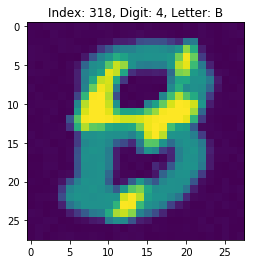

In [7]:
idx = 318
img = train.loc[idx, '0':].values.reshape(28, 28).astype(int)
digit = train.loc[idx, 'digit']
letter = train.loc[idx, 'letter']

plt.title('Index: %i, Digit: %s, Letter: %s'%(idx, digit, letter))
plt.imshow(img)
plt.show()

## Train model

In [8]:
x_train = train.drop(['id', 'digit', 'letter'], axis=1).values
x_train = x_train.reshape(-1, 28, 28, 1)
x_train = x_train/255

y = train['digit']
y_train = np.zeros((len(y), len(y.unique())))
for i, digit in enumerate(y):
    y_train[i, digit] = 1

In [9]:
x_val = x_train[-int(len(x_train)*0.2):]
y_val = y_train[-int(len(y_train)*0.2):]
x_train = x_train[:-int(len(x_train)*0.2)]
y_train = y_train[:-int(len(y_train)*0.2)]

In [10]:
print(str(x_val.shape))
print(str(y_val.shape))
print(str(x_train.shape))
print(str(y_train.shape))

(409, 28, 28, 1)
(409, 10)
(1639, 28, 28, 1)
(1639, 10)


In [11]:
def create_cnn_model(x_train):
    inputs = tf.keras.layers.Input(x_train.shape[1:])

    bn = tf.keras.layers.BatchNormalization()(inputs)
    conv = tf.keras.layers.Conv2D(128,kernel_size=5, strides=1, padding='same', activation='relu')(bn)
    bn = tf.keras.layers.BatchNormalization()(conv)
    conv = tf.keras.layers.Conv2D(128, kernel_size=2, strides=1, padding='same', activation='relu')(bn)
    pool = tf.keras.layers.MaxPooling2D((2, 2))(conv)

    bn = tf.keras.layers.BatchNormalization()(pool)
    conv = tf.keras.layers.Conv2D(256, kernel_size=2, strides=1, padding='same', activation='relu')(bn)
    bn = tf.keras.layers.BatchNormalization()(conv)
    conv = tf.keras.layers.Conv2D(256, kernel_size=2, strides=1, padding='same', activation='relu')(bn)
    pool = tf.keras.layers.MaxPooling2D((2, 2))(conv)

    flatten = tf.keras.layers.Flatten()(pool)

    bn = tf.keras.layers.BatchNormalization()(flatten)
    dense = tf.keras.layers.Dense(1000, activation='relu')(bn)

    bn = tf.keras.layers.BatchNormalization()(dense)
    outputs = tf.keras.layers.Dense(10, activation='softmax')(bn)

    model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

    return model
    
model = create_cnn_model(x_train)

In [33]:
num_classes = 10

model = Sequential([
  layers.Input(x_train.shape[1:]),

  layers.BatchNormalization(),
  layers.Conv2D(128, kernel_size=5, strides=1, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(128, kernel_size=2, strides=1, padding='same', activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Dropout(0.25),

  layers.BatchNormalization(),
  layers.Conv2D(256, kernel_size=2, strides=1, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(256, kernel_size=2, strides=1, padding='same', activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Dropout(0.25),

  layers.Flatten(),

  layers.BatchNormalization(),
  layers.Dense(1000, activation='relu'),
  
  layers.BatchNormalization(),
  layers.Dense(num_classes, activation='softmax')
])

In [7]:
num_classes = 10

model = Sequential([

  layers.Input(x_train.shape[1:]),
  
  layers.BatchNormalization(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.BatchNormalization(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.BatchNormalization(),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.BatchNormalization(),
  layers.Dense(1024, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

In [18]:
datagen = keras.preprocessing.image.ImageDataGenerator(
    # featurewise_center=True,
    # featurewise_std_normalization=True,
    # width_shift_range=0.2,
    # height_shift_range=0.2
    )

In [34]:

model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy']
    )

In [28]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs)

Train on 1639 samples, validate on 409 samples
Epoch 1/20
1639/1639 [==============================] - 3s 2ms/sample - loss: 2.9840 - accuracy: 0.4118 - val_loss: 5.7238 - val_accuracy: 0.1076
Epoch 2/20
1639/1639 [==============================] - 2s 1ms/sample - loss: 0.8738 - accuracy: 0.7047 - val_loss: 10.3080 - val_accuracy: 0.1076
Epoch 3/20
1639/1639 [==============================] - 2s 1ms/sample - loss: 0.5109 - accuracy: 0.8286 - val_loss: 10.8498 - val_accuracy: 0.1076
Epoch 4/20
1639/1639 [==============================] - 2s 1ms/sample - loss: 0.3367 - accuracy: 0.8877 - val_loss: 14.0600 - val_accuracy: 0.1076
Epoch 5/20
1639/1639 [==============================] - 2s 1ms/sample - loss: 0.2964 - accuracy: 0.8969 - val_loss: 13.4800 - val_accuracy: 0.1076
Epoch 6/20
1639/1639 [==============================] - 2s 1ms/sample - loss: 0.2359 - accuracy: 0.9207 - val_loss: 14.4511 - val_accuracy: 0.1076
Epoch 7/20
1639/1639 [==============================] - 2s 1ms/sample - 

In [37]:
epochs=20
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=8),steps_per_epoch=len(x_train) / 8,validation_data=(x_val, y_val), epochs = epochs)

  ...
    to  
  ['...']
Train for 204.875 steps, validate on 409 samples
Epoch 1/20
205/204 [==============================] - 5s 23ms/step - loss: 1.6008 - accuracy: 0.6388 - val_loss: 2.4308 - val_accuracy: 0.5819
Epoch 2/20
205/204 [==============================] - 4s 21ms/step - loss: 0.8691 - accuracy: 0.7474 - val_loss: 1.3941 - val_accuracy: 0.6895
Epoch 3/20
205/204 [==============================] - 4s 21ms/step - loss: 0.2901 - accuracy: 0.8981 - val_loss: 1.3937 - val_accuracy: 0.6919
Epoch 4/20
205/204 [==============================] - 4s 21ms/step - loss: 0.1132 - accuracy: 0.9683 - val_loss: 1.1745 - val_accuracy: 0.7359
Epoch 5/20
205/204 [==============================] - 4s 21ms/step - loss: 0.0505 - accuracy: 0.9878 - val_loss: 1.1961 - val_accuracy: 0.7286
Epoch 6/20
205/204 [==============================] - 4s 21ms/step - loss: 0.0345 - accuracy: 0.9908 - val_loss: 1.2351 - val_accuracy: 0.7579
Epoch 7/20
205/204 [==============================] - 4s 21ms/step -

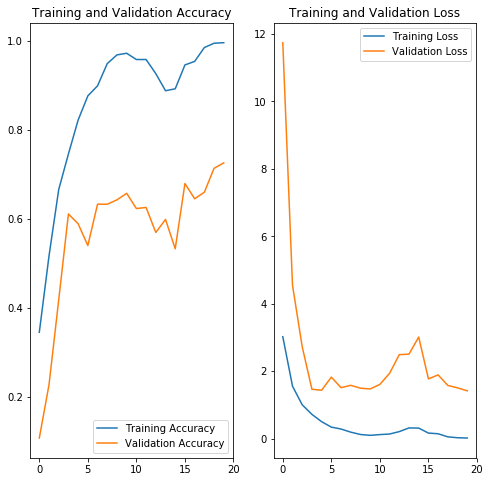

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Predict

In [38]:
x_test = test.drop(['id', 'letter'], axis=1).values
x_test = x_test.reshape(-1, 28, 28, 1)
x_test = x_test/255

submission = pd.read_csv('data/submission.csv')
submission['digit'] = np.argmax(model.predict(x_test), axis=1)
submission.head()

,id,digit
0,2049,6
1,2050,0
2,2051,6
3,2052,0
4,2053,3


In [39]:
submission.to_csv('08241530(dropout0.25).csv', index=False)